In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Importing the Data

In [2]:
#reading the csv and encoding the file
df = pd.read_csv('NYT_bestseller.csv', encoding = "ISO-8859-1")
df.head(5)

,published_date,list_name,list_name_encoded,rank,isbn13,isbn10,title,author,description,amazon_product_url,price,weeks_on_list
0,1/3/2010,Chapter Books,chapter-books,1,9.78E+12,316036242,WITCH AND WIZARD,James Patterson and Gabrielle Charbonnet,"One of each, brother and sister, flex their ne...",https://www.amazon.com/Witch-Wizard-James-Patt...,17.99,1
1,1/3/2010,Chapter Books,chapter-books,2,9.78E+12,439023483,THE HUNGER GAMES,Suzanne Collins,"In a dystopian future, a girl fights for survi...",https://www.amazon.com/The-Hunger-Games-Suzann...,17.99,67
2,1/3/2010,Chapter Books,chapter-books,3,9.78E+12,439023491,CATCHING FIRE,Suzanne Collins,"The protagonist of ""The Hunger Games"" returns.",https://www.amazon.com/Catching-Fire-Hunger-Ga...,17.99,16
3,1/3/2010,Chapter Books,chapter-books,4,9.78E+12,763644102,THE MAGICIANâS ELEPHANT,Kate DiCamillo,An orphan in search of his sister follows a fo...,https://www.amazon.com/The-Magicians-Elephant-...,16.99,15
4,1/3/2010,Chapter Books,chapter-books,5,9.78E+12,385738935,FALLEN,Lauren Kate,"Thwarted love among misfits at a Savannah, Ga....",https://www.amazon.com/Fallen-Lauren-Kate/dp/0...,17.99,2


### Preliminary Data Analysis

In [3]:
#understanding the size of the data and list of all columns
df.shape

(61430, 12)

In [4]:
df.columns

Index(['published_date', 'list_name', 'list_name_encoded', 'rank', 'isbn13',
       'isbn10', 'title', 'author', 'description', 'amazon_product_url',
       'price', 'weeks_on_list'],
      dtype='object')

In [5]:
#extracting the data types and getting the information of each field
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61430 entries, 0 to 61429
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   published_date      61430 non-null  object 
 1   list_name           61430 non-null  object 
 2   list_name_encoded   61430 non-null  object 
 3   rank                61430 non-null  int64  
 4   isbn13              61426 non-null  object 
 5   isbn10              60146 non-null  object 
 6   title               61430 non-null  object 
 7   author              61361 non-null  object 
 8   description         53311 non-null  object 
 9   amazon_product_url  61430 non-null  object 
 10  price               61430 non-null  float64
 11  weeks_on_list       61430 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 5.6+ MB


In [6]:
#statistical analysis of each field
df.describe( )

,rank,price,weeks_on_list
count,61430.000000,61430.000000,61430.000000
mean,3.000000,3.863068,24.706267
std,1.414225,8.789769,63.534314
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,3.000000,0.000000,2.000000
75%,4.000000,0.000000,16.000000
max,5.000000,150.000000,607.000000


In [7]:
df.corr()

,rank,price,weeks_on_list
rank,1.000000,-0.006788,-0.001580
price,-0.006788,1.000000,-0.005511
weeks_on_list,-0.001580,-0.005511,1.000000


### Data Cleaning

In [8]:
#renaming/redefining the columns. Dropping fields that the team deems to be unnecessary
df.rename(columns ={'published_date':'bestseller_list_date', 'list_name': 'genre'}, inplace=True)
df.drop(columns=['list_name_encoded','isbn10', 'amazon_product_url','description'], inplace=True)
df.head(5)

,bestseller_list_date,genre,rank,isbn13,title,author,price,weeks_on_list
0,1/3/2010,Chapter Books,1,9.78E+12,WITCH AND WIZARD,James Patterson and Gabrielle Charbonnet,17.99,1
1,1/3/2010,Chapter Books,2,9.78E+12,THE HUNGER GAMES,Suzanne Collins,17.99,67
2,1/3/2010,Chapter Books,3,9.78E+12,CATCHING FIRE,Suzanne Collins,17.99,16
3,1/3/2010,Chapter Books,4,9.78E+12,THE MAGICIANâS ELEPHANT,Kate DiCamillo,16.99,15
4,1/3/2010,Chapter Books,5,9.78E+12,FALLEN,Lauren Kate,17.99,2


In [9]:
#checking the number of nulls
df.isnull( ).sum( )

bestseller_list_date     0
genre                    0
rank                     0
isbn13                   4
title                    0
author                  69
price                    0
weeks_on_list            0
dtype: int64

In [10]:
df.nunique( )

bestseller_list_date     522
genre                     59
rank                       5
isbn13                    68
title                   6577
author                  3609
price                     94
weeks_on_list            598
dtype: int64

In [11]:
df.duplicated( )

0        False
1        False
2        False
3        False
4        False
         ...  
61425    False
61426    False
61427    False
61428    False
61429    False
Length: 61430, dtype: bool

In [12]:
#adding year and month column separately
df['bestseller_list_date'] = pd.to_datetime(df['bestseller_list_date'])
df['year'] = df['bestseller_list_date'].dt.year
df['month'] = df['bestseller_list_date'].dt.month

### Data Analysis and Findings

#### 1) Top 5 #1 Bestsellers

In [13]:
#finding the top 5 bestsellers that have been on the NYT bestseller list the longest
bestselling_books = df.groupby(['title','genre'])['weeks_on_list'].agg('max').sort_values(ascending=False).head(5)
bestselling_books.to_frame()

,,weeks_on_list
title,genre,
WHAT TO EXPECT WHEN YOU'RE EXPECTING,Paperback Advice,607
DIARY OF A WIMPY KID,Series Books,561
HARRY POTTER,Series Books,560
PERCY JACKSON & THE OLYMPIANS,Series Books,517
THE ALCHEMIST,Trade Fiction Paperback,422


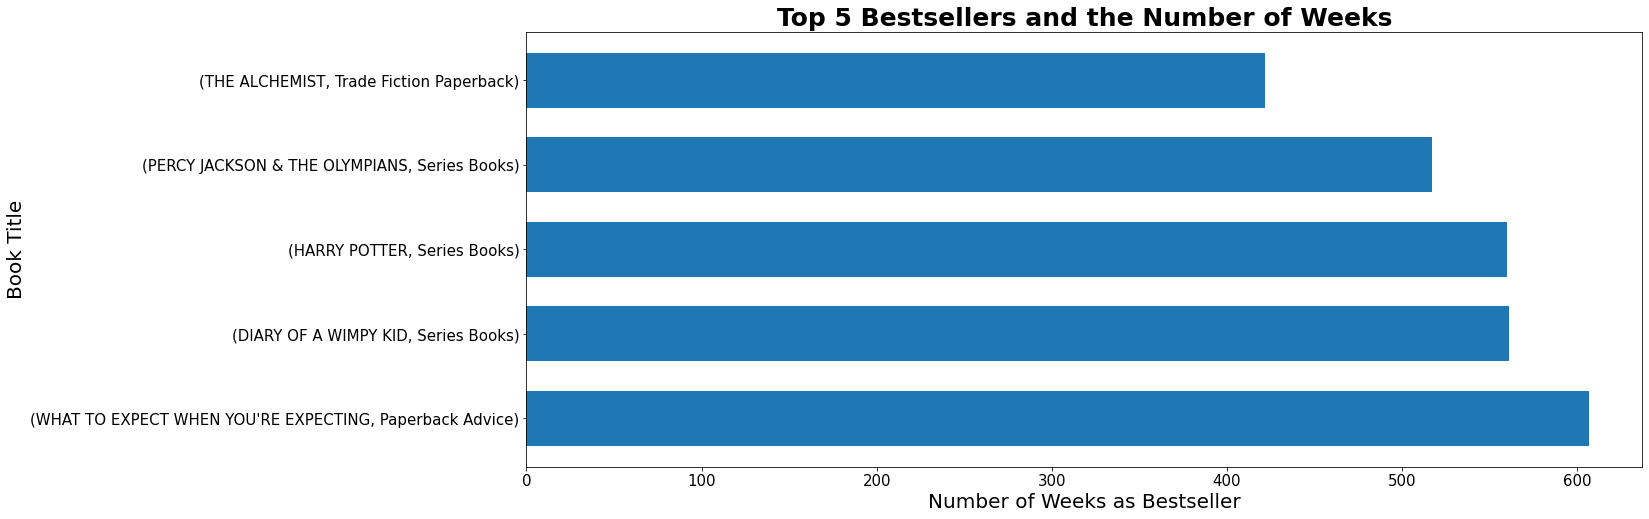

In [14]:
bestselling_books.plot(kind='barh', figsize=(20,8), width = 0.65)
plt.title("Top 5 Bestsellers and the Number of Weeks", fontweight='bold', fontsize = 25)
plt.xlabel("Number of Weeks as Bestseller", fontsize = 20)
plt.ylabel("Book Title", fontsize = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
pass

#### 2) Top 5 Bestselling Books That Ranked #1 Most Often

In [15]:
title_ranked_number_one = df[df['rank'] == 1]
longest_number_one_titles = title_ranked_number_one[['title', 'bestseller_list_date']].groupby('title').count().sort_values('bestseller_list_date', ascending = False).head(5)
longest_number_one_titles.rename(columns={'bestseller_list_date':'List Date'}, inplace=True)
longest_number_one_titles.index.name = 'Title'
longest_number_one_titles

,List Date
Title,
WONDER,204
HEAVEN IS FOR REAL,160
UNBROKEN,144
THE FIVE LOVE LANGUAGES,131
WHEN BREATH BECOMES AIR,131


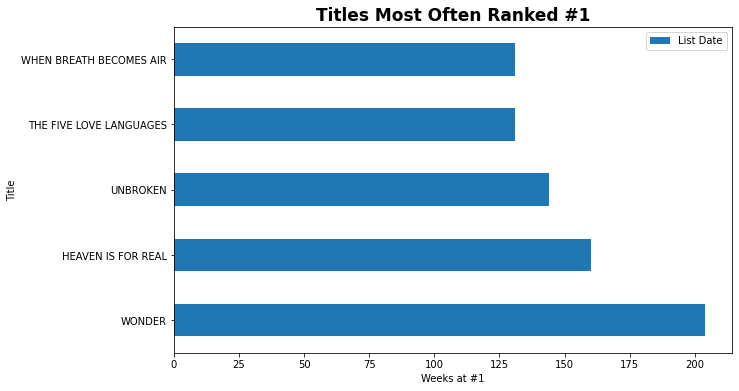

In [38]:
longest_number_one_titles.plot(kind='barh', figsize=(10,6))
plt.xlabel('Weeks at #1')
plt.ylabel('Title')
plt.title('Titles Most Often Ranked #1', fontsize = 17, fontweight ='bold')
plt.plot
pass

In [17]:
longest_number_one_authors = title_ranked_number_one[['author', 'bestseller_list_date']].groupby('author').count().sort_values('bestseller_list_date', ascending = False).head(5)
longest_number_one_authors.rename(columns={'bestseller_list_date': 'Count of Times Title(s) were ranked Number One '}, inplace=True)
longest_number_one_authors.index.name = 'Author'
longest_number_one_authors

,Count of Times Title(s) were ranked Number One
Author,
Bill O'Reilly and Martin Dugard,230
RJ Palacio,205
Malcolm Gladwell,161
Todd Burpo with Lynn Vincent,160
E L James,159


#### 3) Bestsellers by Genre

In [18]:
#finding all unique genres in the NYT bestseller lest
df['genre'].unique()

array(['Chapter Books', 'Hardcover Advice', 'Hardcover Fiction',
       'Hardcover Graphic Books', 'Hardcover Nonfiction', 'Manga',
       'Mass Market Paperback', 'Paperback Advice', 'Paperback Books',
       'Paperback Graphic Books', 'Paperback Nonfiction', 'Picture Books',
       'Series Books', 'Trade Fiction Paperback',
       'Combined Print Fiction', 'Combined Print Nonfiction',
       'Combined Print and E-Book Fiction',
       'Combined Print and E-Book Nonfiction', 'E-Book Fiction',
       'E-Book Nonfiction', 'Hardcover Business Books',
       'Hardcover Political Books', 'Paperback Business Books',
       'Childrens Middle Grade', 'Young Adult', 'Science',
       'Advice How-To and Miscellaneous', 'Food and Fitness',
       'Business Books', 'Sports', 'Animals', 'Celebrities', 'Family',
       'Humor', 'Relationships', 'Religion Spirituality and Faith',
       'Travel', 'Crime and Punishment', 'Culture', 'Education',
       'Fashion Manners and Customs', 'Games and Activit

In [19]:
#number of unique genres
df['genre'].nunique()

59

In [20]:
#grouping the number of books by genre
bestseller_genre = df.groupby(['genre'])['title'].agg('count').sort_values(ascending=False)
bestseller_genre.to_frame()

,title
genre,
Hardcover Fiction,2610
Trade Fiction Paperback,2610
Series Books,2610
Picture Books,2610
Paperback Nonfiction,2610
Hardcover Nonfiction,2610
Combined Print and E-Book Fiction,2320
Combined Print and E-Book Nonfiction,2320
Paperback Graphic Books,1850


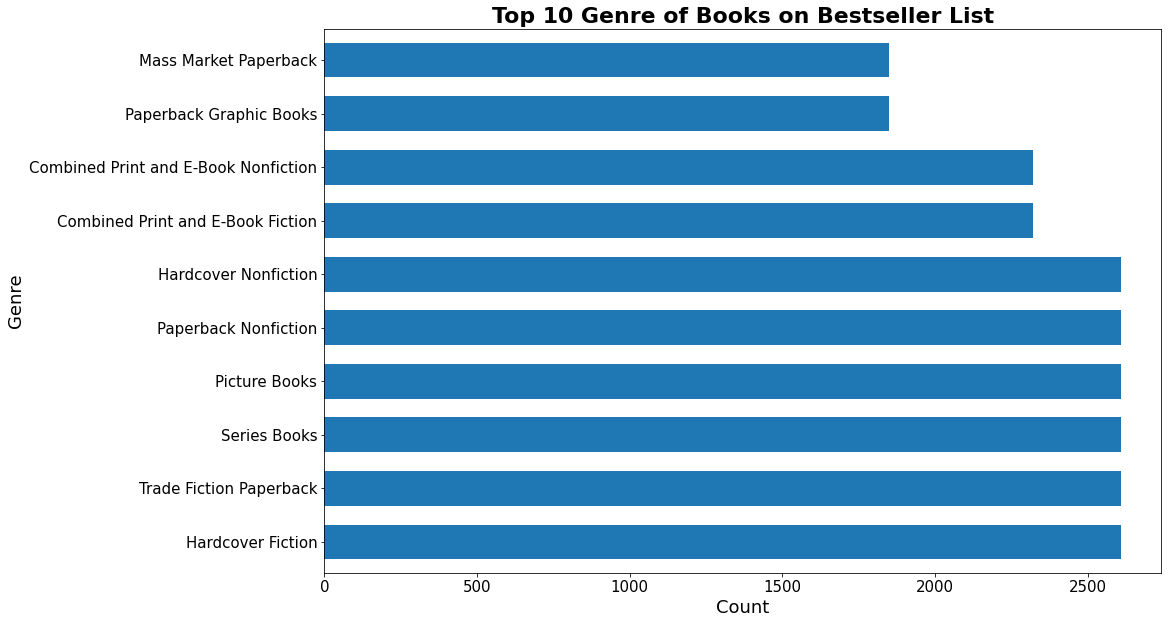

In [21]:
bestseller_genre[:10].plot(kind = "barh", figsize = (15,10), width = 0.65, fontsize=15)
plt.title("Top 10 Genre of Books on Bestseller List", fontweight= "bold", fontsize=22)
plt.xlabel("Count", fontsize = 18)
plt.ylabel("Genre", fontsize = 18)
pass

In [31]:
#performing regression model to understand the relationship between the variables
regressor_df = df.drop_duplicates()
x = regressor_df['price'].values.reshape((-1,1))
y = regressor_df['weeks_on_list'].values
model = LinearRegression().fit(x,y)
r_sq = model.score(x, y)

In [30]:
print(f"intercept for price/weeks on best seller list: {model.intercept_}")
print(f"slope for price/weeks on best seller list: {model.coef_}")
print(f"coefficient of determination for price/weeks on best seller list: {r_sq}")
print('price is not a factor')

intercept for price/weeks on best seller list: 24.860156748411406
slope for price/weeks on best seller list: [-0.03983607]
coefficient of determination for price/weeks on best seller list: 3.037325217580822e-05
price is not a factor


In [35]:
#finding out the average number of weeks on NYT bestseller list per book
longest_bestselling_titles_catagories = df[['title', 'genre', 'weeks_on_list']]\
                             .groupby('genre')\
                             .mean()\
                             .sort_values('weeks_on_list', ascending = False)\
                             
bestselling_books.to_frame().rename(columns={'weeks_on_list': 'Weeks on Bestseller List', 'genre':'Genre'}, inplace=True)
bestselling_books.index.name = 'genre'

#categorizing: books that have been on the bestseller lists for 0 week vs. 0+ weeks
worst_markets = longest_bestselling_titles_catagories.query('weeks_on_list == 0')
long_game = longest_bestselling_titles_catagories.query('weeks_on_list > 0')

In [36]:
#to be ignored from the dataset
worst_markets

,weeks_on_list
genre,
Games and Activities,0.0
Combined Print Fiction,0.0
Combined Print Nonfiction,0.0
Race and Civil Rights,0.0
Relationships,0.0
Religion Spirituality and Faith,0.0
Science,0.0
Sports,0.0
Culture,0.0


In [33]:
long_game

,weeks_on_list
genre,
Series Books,151.708812
Paperback Advice,147.076301
Paperback Nonfiction,62.859770
Paperback Books,56.744156
Young Adult,51.188652
Picture Books,47.295785
Trade Fiction Paperback,41.413027
Paperback Graphic Books,40.870811
Advice How-To and Miscellaneous,40.582808


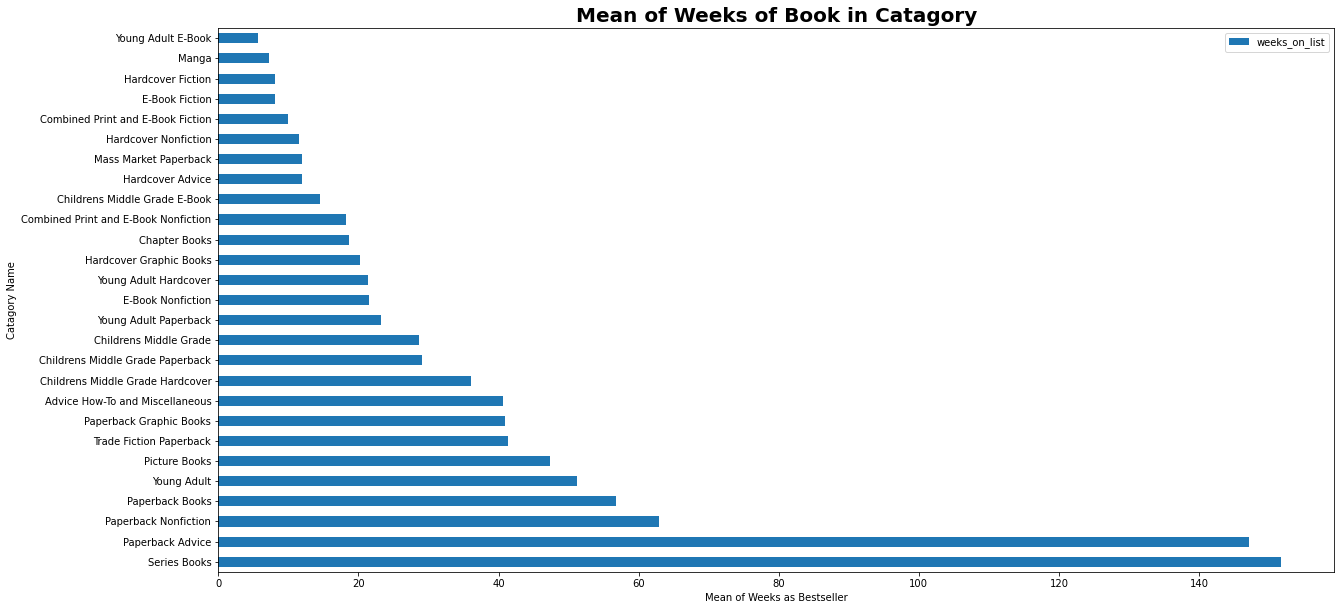

In [26]:
long_game.plot(kind='barh', figsize=(20,10))
plt.xlabel('Mean of Weeks as Bestseller')
plt.ylabel('Catagory Name')
plt.title('Mean of Weeks of Book in Catagory', fontsize = 20, fontweight = 'bold')
pass

#### 4) Top 10 Bestselling Authors

In [27]:
#grouping the dataframe by each author to show the number of books published by each author
authors = df['author'].value_counts()
authors

Bill O'Reilly and Martin Dugard    741
Laura Hillenbrand                  662
Malcolm Gladwell                   624
E L James                          620
Rick Riordan                       610
                                  ... 
Dan Jurgens                          1
Alison Goodman                       1
Paul Allen                           1
Katie Couric                         1
Michael Greger                       1
Name: author, Length: 3609, dtype: int64

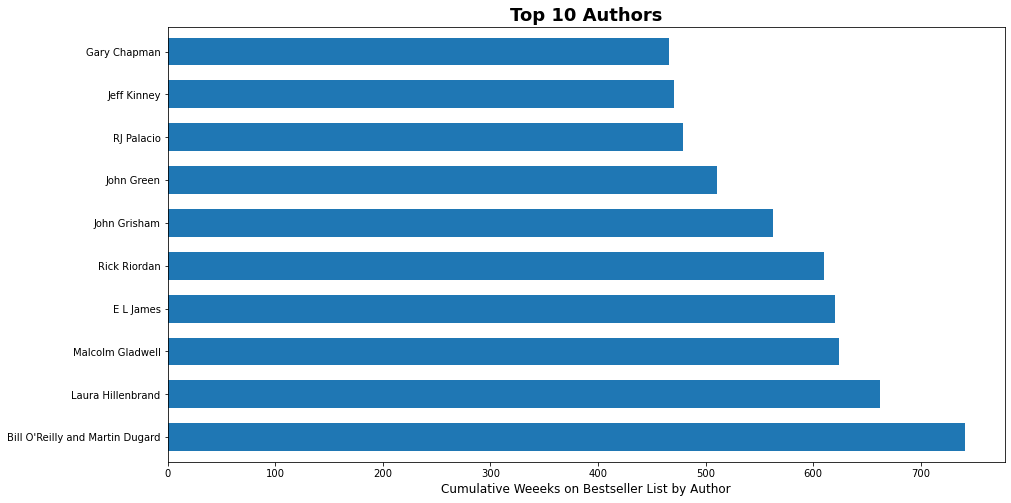

In [39]:
authors[:10].plot(kind = "barh", figsize = (15,8), width = 0.65, fontsize=15)
plt.title("Top 10 Authors",fontsize=18, fontweight='bold')
plt.xlabel('Cumulative Weeeks on Bestseller List by Author',fontsize=12)
plt.xticks(size = 10)
plt.yticks(size = 10)
pass